<a href="https://colab.research.google.com/github/EWECORP/DScience_41870/blob/main/Desafio_AlgoritmoML_MVP_Eduard_Ettlin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

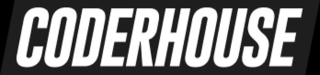

# **CURSO DE DATA SCIENCE**

# **DESAFIO ALGORITMO ML MVP**

# **DESAFIO N° 12**

*AUTOR:Eduardo ETTLIN*

In [1]:
#Conectamos mi drive
from google.colab import drive
#Importamos OS
import os
#Montamos drive
drive.mount('/content/gdrive', force_remount=True)
# Establecer ruta de acceso en drive
import os
print(os.getcwd())

Mounted at /content/gdrive
/content


In [2]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Me muevo a la carpeta
os.chdir("/content/gdrive/MyDrive/DScience_41870")
print(os.getcwd())

#Lectura del dataframe
datos=pd.read_csv('/content/gdrive/MyDrive/DScience_41870/US_Accidents_Dec21_updated.csv',sep=',',nrows=150000)  # nrows: 1500000  # Disminuir Tamaño a 1.5 MM (Riginalmente Tiene 2.845.342 registros)

/content/gdrive/MyDrive/DScience_41870


In [4]:
datos.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


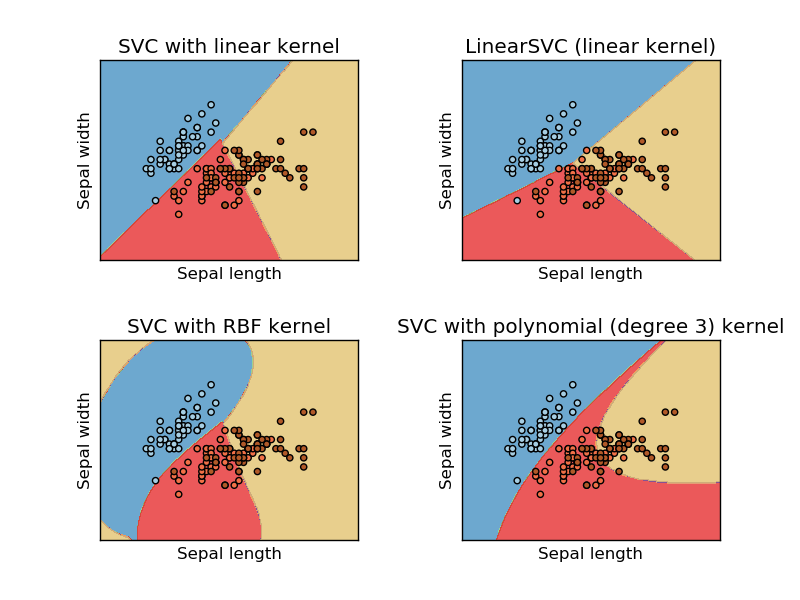

## Enriquecer el Modelo
Con variables derivadas de las existentes

In [5]:
datos['Hora'] = pd.to_datetime( datos['Start_Time'],format='%Y-%m-%d %H:%M:%S').dt.hour  # Extraer la HORA del Día en la

In [6]:
datos['Anio_Mes'] =  pd.to_datetime( datos['Start_Time'],format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m')  # Extraer AÑO y MES

In [7]:
datos['day_of_week'] = pd.to_datetime( datos['Start_Time'],format='%Y-%m-%d %H:%M:%S').dt.dayofweek  # Dia de la Semana

days = {0:'Lunes',1:'Martes',2:'Miércoeles',3:'Jueves',4:'Viernes',5:'Sabado',6:'Domingo'}
datos['day_of_week'] = datos['day_of_week'].apply(lambda x: days[x])

In [8]:
datos['Mes'] = pd.to_datetime( datos['Start_Time'],format='%Y-%m-%d %H:%M:%S').dt.strftime('%B')  # Extraer Nombre del MES

In [9]:
## Identificar la Estación Climática

def estacion_climatica(mes):
  if mes.lower() in ('january','february','march'):
    return 'Invierno'
  elif mes.lower() in ('april','may','june'):
    return 'Primavera'
  elif mes.lower() in ('july','august','september'):
    return 'Verano'
  else:
    return 'Otoño'

In [10]:
datos['estacion_meteorologica'] = pd.to_datetime( datos['Start_Time'],format='%Y-%m-%d %H:%M:%S').dt.strftime('%B')  # Extraer Nombre del MES

In [11]:
 datos['estacion_meteorologica'] = datos['estacion_meteorologica'].apply(estacion_climatica)

In [12]:
datos.Severity.unique()

array([3, 2, 4])

In [13]:
datos.shape

(150000, 52)

In [14]:
datos.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Hora', 'Anio_Mes', 'day_of_week', 'Mes',
       'estacion_meteorologica'],
      dtype='object')

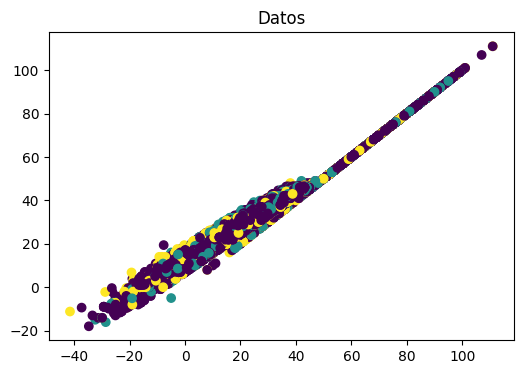

In [15]:
#Visualizacion!
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(datos['Wind_Chill(F)'], datos['Temperature(F)'], c=datos.Severity);
ax.set_title("Datos");

# DATOS RELEVANTES o CANDIDATOS:

Del mapa de calor aterior surgen como con factores potencial la siguiente lista de factores:

Traffic_Calming
Traffic_Signal
Railway
Crossing
Station
Bump
Visibility(mi)
Temperature(F)

Hora
day_of_week

Debo Usar Variable Continuas para Predecir????

In [16]:
X = datos.fillna(0, inplace=True)

# ENFOQUE 1 - SVC

In [17]:
# División de los datos en train y test
X = datos.drop(columns = ['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp','Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Give_Way', 'Junction', 'No_Exit','Roundabout',  'Stop',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Hora', 'Anio_Mes', 'day_of_week', 'Mes',
       'Traffic_Calming', 'Traffic_Signal','Railway','Crossing', 'Station', 'Bump',
       'estacion_meteorologica'], axis= 1) # Matriz de 2 columnas -Variable Independientes   'Temperature(F)', 'Wind_Chill(F)'
y = datos['Severity'] # Vector de 200 filas y 1 columa- Variable Dependiente

In [18]:
X

,Temperature(F),Wind_Chill(F)
0,42.1,36.1
1,36.9,0.0
2,36.0,0.0
3,39.0,0.0
4,37.0,29.8
...,...,...
149995,77.0,0.0
149996,71.6,0.0
149997,61.0,0.0
149998,69.1,0.0


In [19]:
y

0         3
1         2
2         2
3         2
4         3
         ..
149995    3
149996    2
149997    2
149998    2
149999    4
Name: Severity, Length: 150000, dtype: int64

In [20]:
 y.values.reshape(-1,1)

array([[3],
       [2],
       [2],
       ...,
       [2],
       [2],
       [4]])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),train_size= 0.75,\
                                                    random_state = 42,shuffle=True)

In [22]:
SVC?

**gamma** es un parámetro para hiperplanos no lineales. Cuanto mayor sea el valor de gamma, intentará ajustarse exactamente al conjunto de datos de entrenamiento.

**C** es el parámetro de penalización del término de error. Controla el equilibrio entre un límite de decisión uniforme y la clasificación correcta de los puntos de entrenamiento.

In [23]:
# Creación del modelo SVM
modelo = SVC(C=0.1,kernel='sigmoid',random_state=42, verbose= True)
modelo.fit(X_train, y_train)

[LibSVM]

SVC(C=0.1, kernel='sigmoid', random_state=42, verbose=True)

In [24]:
#Predicciones!
#y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

In [25]:
X_test

,Temperature(F),Wind_Chill(F)
59770,73.0,0.0
21362,77.0,0.0
127324,75.2,0.0
140509,48.0,0.0
144297,66.2,0.0
...,...,...
77729,75.0,0.0
87366,81.0,0.0
135907,78.1,0.0
70824,84.9,0.0


In [26]:
X_test.shape

(37500, 2)

In [27]:
y_test_pred

array([2, 2, 2, ..., 2, 3, 2])

In [28]:
y_test

array([[2],
       [2],
       [2],
       ...,
       [3],
       [3],
       [2]])

In [29]:
#Calculo el accuracy en Test
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.6123466666666667


# ENFOQUE 2 - RANDOM FOREST

In [ ]:
# División de los datos en train y test
X = datos.drop(columns = ['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Give_Way', 'Junction', 'No_Exit', 'Roundabout',  'Stop',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Anio_Mes',  'Mes',
       'Temperature(F)', 'Wind_Chill(F)',
       'estacion_meteorologica'], axis= 1) # Matriz de 2 columnas -Variable Independientes   'Hora','day_of_week','Traffic_Calming', 'Traffic_Signal','Railway','Crossing', 'Station', 'Bump',
y = datos['Severity'] # Vector de 200 filas y 1 columa- Variable Dependiente

In [ ]:
X

In [ ]:
y

### One Hot Encode - Variables Categóricas

In [ ]:
 y.values.reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),train_size= 0.75,\
                                                    random_state = 42,shuffle=True)